In [96]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [97]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [98]:
data = sns.load_dataset('titanic')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [100]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [102]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
data['class'].unique()
# converting in integers

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [104]:
# creating a copy of the data frame for safe use 

df = data.copy()

In [105]:
def changeClass(Series):
    data = {'First' : 1 , 'Second' : 2 , 'Third' : 3}
    return Series.map(data)

def changeAliveNum(Series):
    data = {'no' : 0 , 'yes' : 1}
    return Series.map(data)
    

In [106]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\Crashlar\AppData\Local\Temp\ipykernel_3216\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [107]:
df['class_num'] = changeClass(df['class'])
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\Crashlar\AppData\Local\Temp\ipykernel_3216\2410687506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [108]:
df.drop('deck', axis=1, inplace=True)


In [109]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,3


In [110]:
df['alive_num'] = changeAliveNum(df['alive'])

In [111]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,class_num,alive_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,3,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,3,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,3,0


<Axes: xlabel='survived', ylabel='count'>

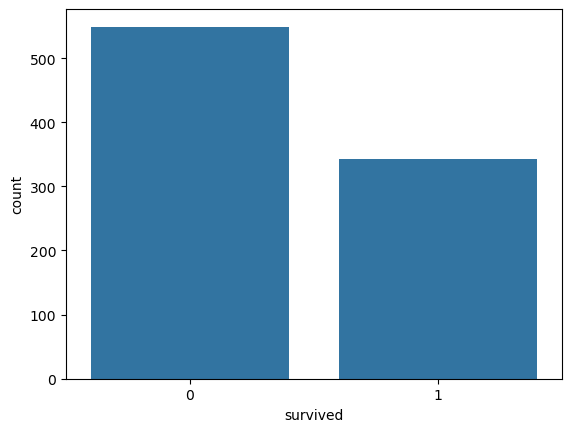

In [112]:
# survival rate 
sns.countplot(data=df,  x = 'survived')

In [42]:
pd.crosstab(df['class'] , df['sex'] , normalize='columns')*100

sex,female,male
class,,
First,29.936306,21.143847
Second,24.203822,18.717504
Third,45.859873,60.138648


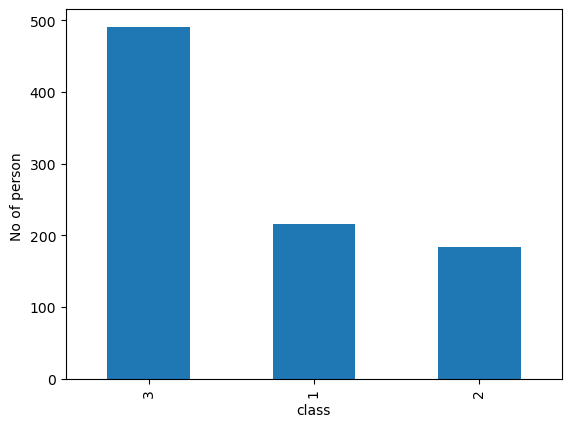

In [48]:
df['class_num'].value_counts().plot(kind = 'bar')
plt.xlabel("class")

plt.ylabel("No of person ")
plt.show()

<Axes: xlabel='adult_male'>

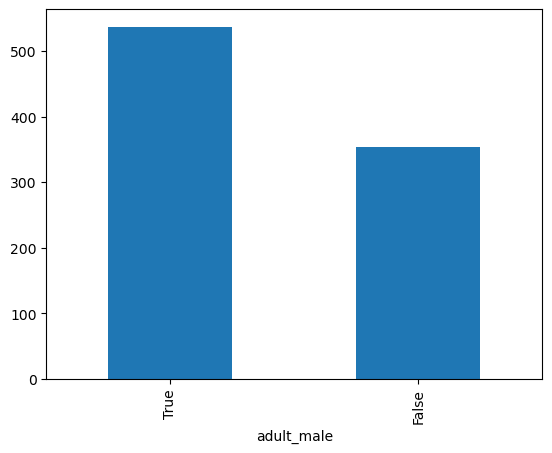

In [51]:
# What was the gender split of passengers on board?

df['adult_male'].value_counts().plot(kind= 'bar')

<Axes: xlabel='age', ylabel='Density'>

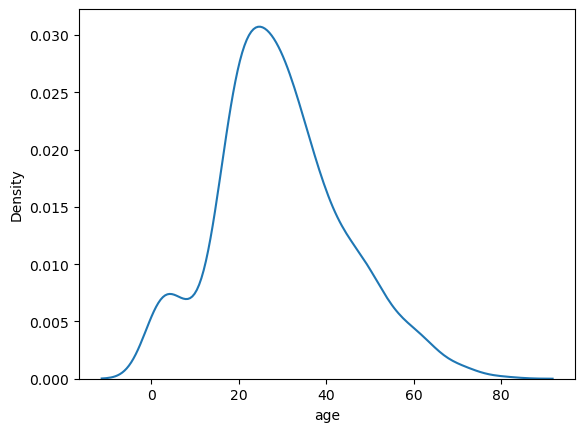

In [55]:
sns.kdeplot(df['age'])

In [61]:
df['age'].skew()
# normal distribution like 

np.float64(0.38910778230082704)

In [59]:
df['fareINR'] = df['fare'].apply(lambda x: x * 88.72 if isinstance(x, float) else x)

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_num,alive_num,fareINR
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3,0,643.220000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1,6324.254376
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3,1,703.106000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1,4711.032000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3,0,714.196000


In [62]:
df['fareINR'].skew()
# right skew 

np.float64(4.787316519674893)

<Axes: xlabel='fareINR', ylabel='Count'>

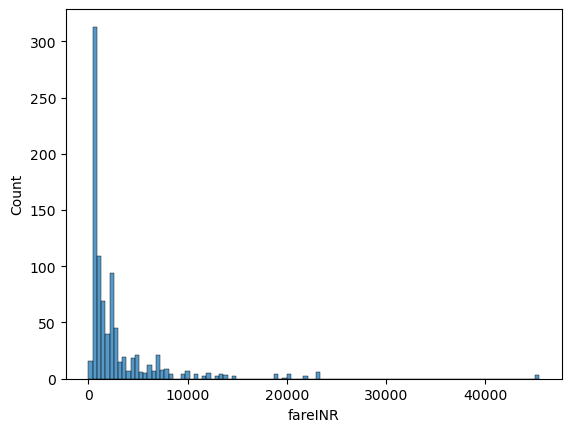

In [67]:
sns.histplot(df['fareINR'])

In [70]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

Text(0, 0.5, 'Prefer Passenger ')

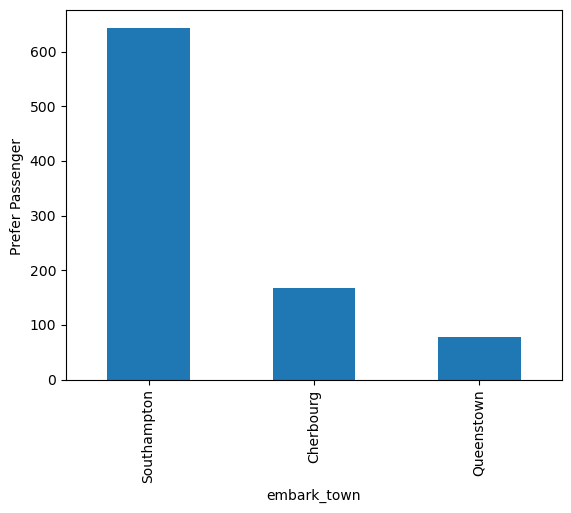

In [74]:
df['embark_town'].value_counts().plot(kind = ('bar'))
plt.ylabel("Prefer Passenger ")

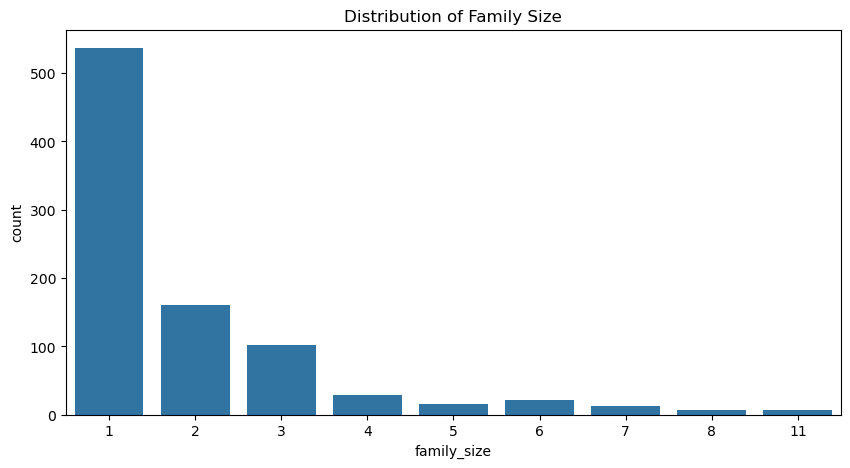

In [114]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
plt.figure(figsize=(10, 5))
sns.countplot(x='family_size', data=df)
plt.title('Distribution of Family Size')
plt.show()

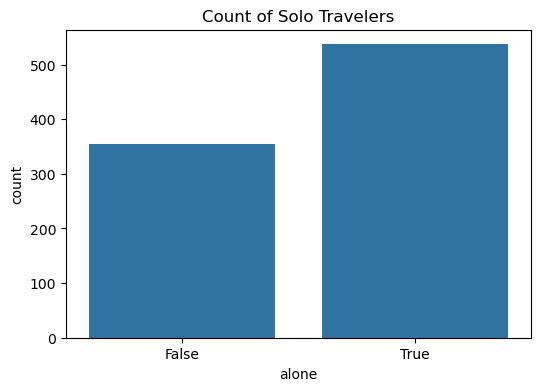

In [115]:
df['alone'] = (df['family_size'] == 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='alone', data=df)
plt.title('Count of Solo Travelers')
plt.show()

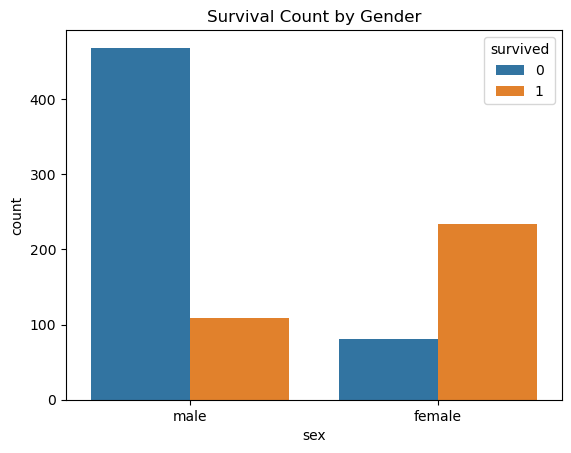

In [116]:
# Did gender play a role in survival? (Use a countplot with hue='Survived'
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

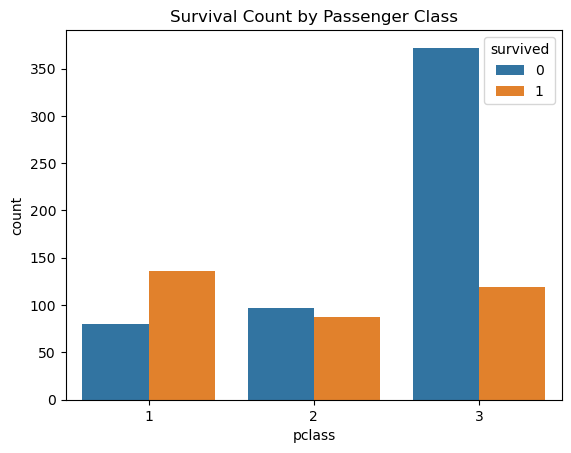

In [117]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

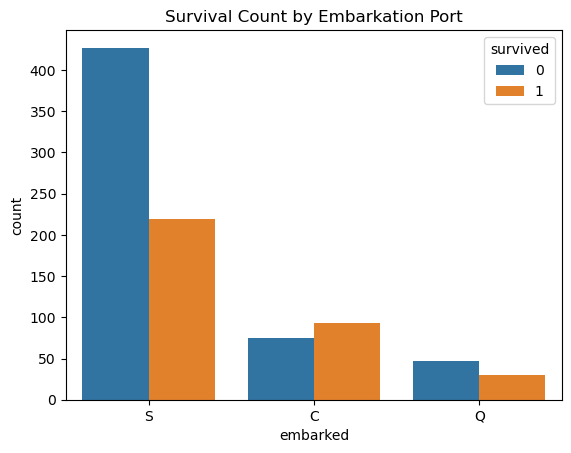

In [118]:
sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.show()

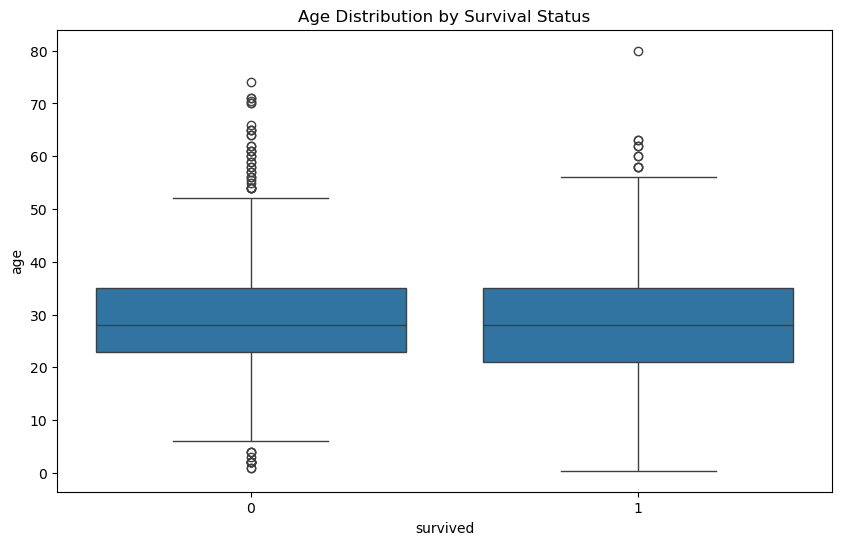

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

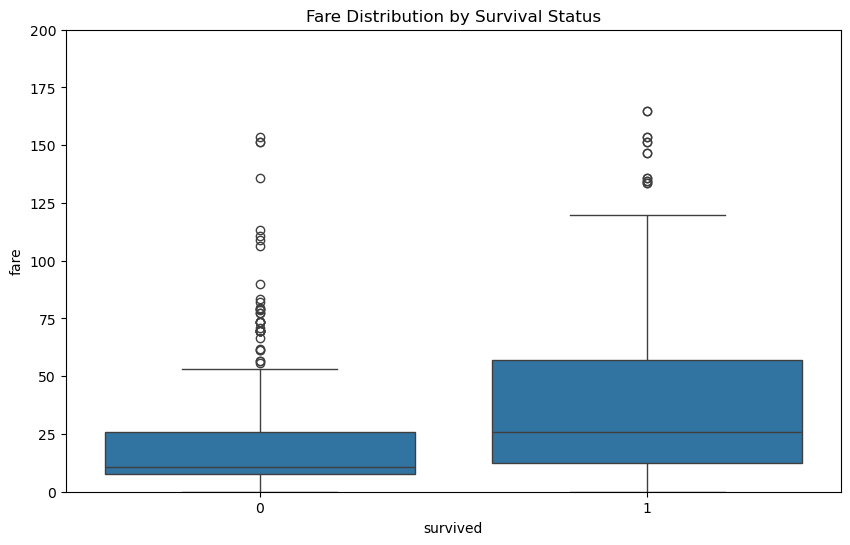

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', data=df)
plt.ylim(0, 200) # Limiting y-axis to see the boxplots better
plt.title('Fare Distribution by Survival Status')
plt.show()

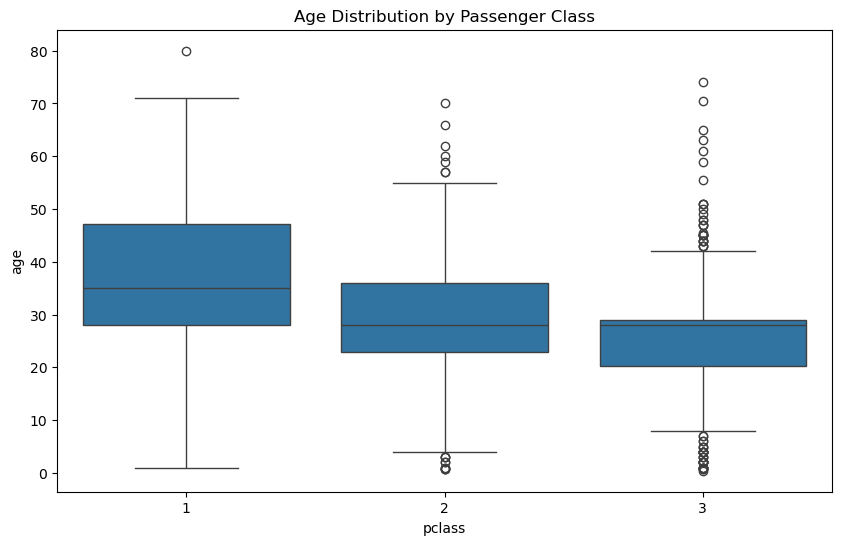

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

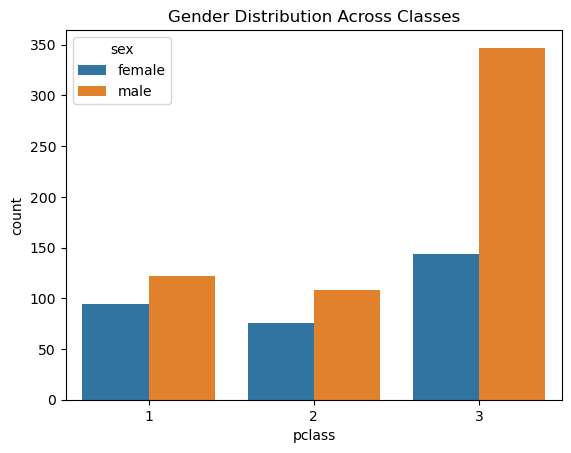

In [122]:
sns.countplot(x='pclass', hue='sex', data=df)
plt.title('Gender Distribution Across Classes')
plt.show()

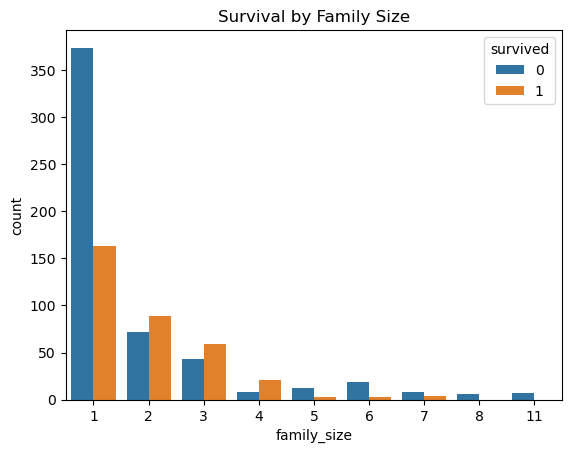

In [123]:
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival by Family Size')
plt.show()

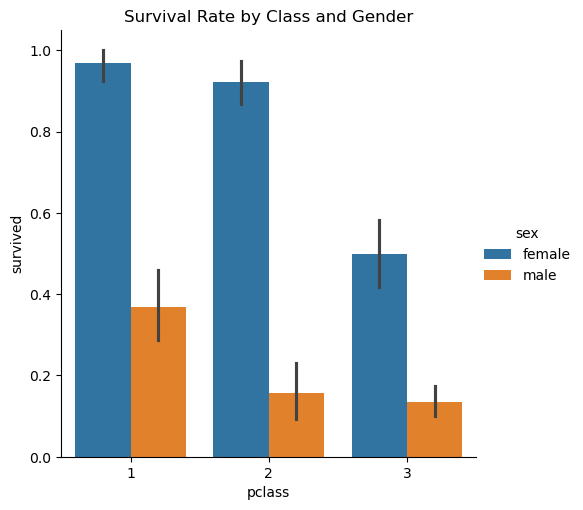

In [124]:
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()

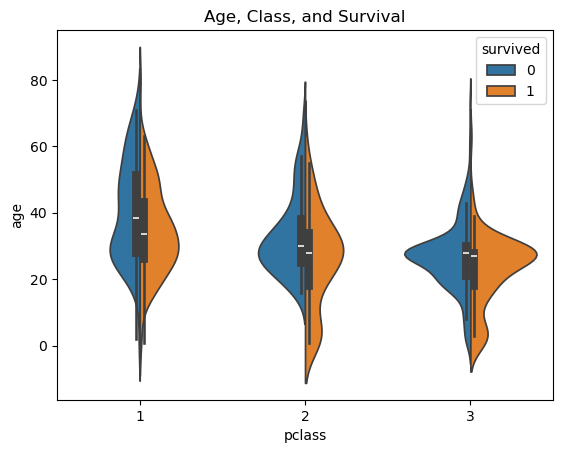

In [125]:
sns.violinplot(x='pclass', y='age', hue='survived', data=df, split=True)
plt.title('Age, Class, and Survival')
plt.show()

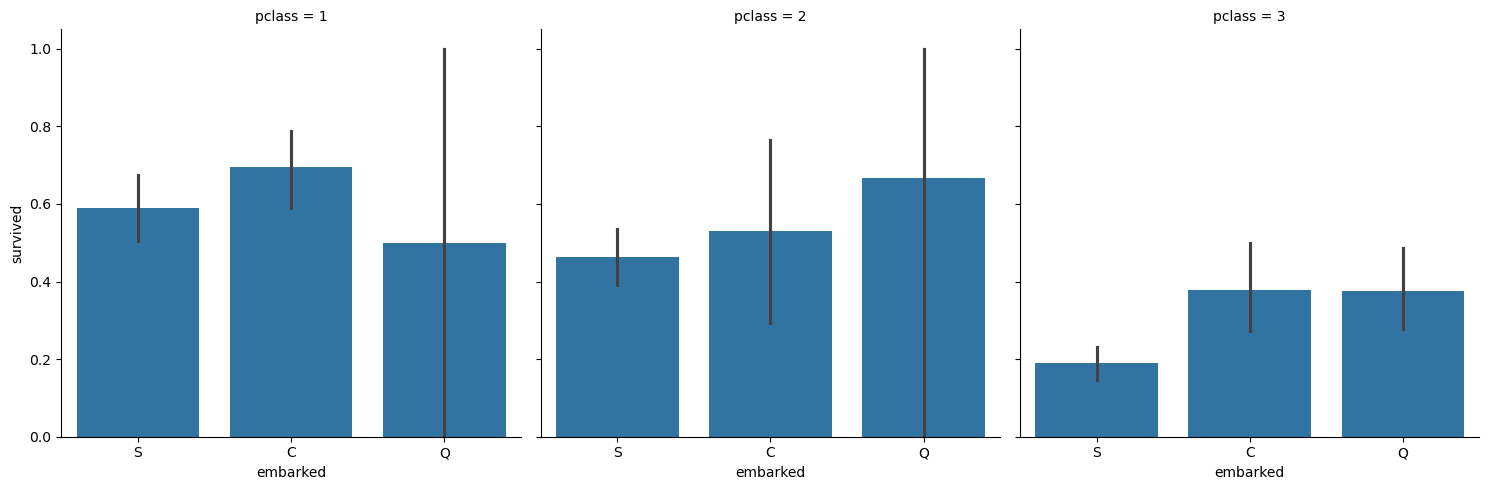

In [126]:
sns.catplot(x='embarked', y='survived', col='pclass', kind='bar', data=df)
plt.show()

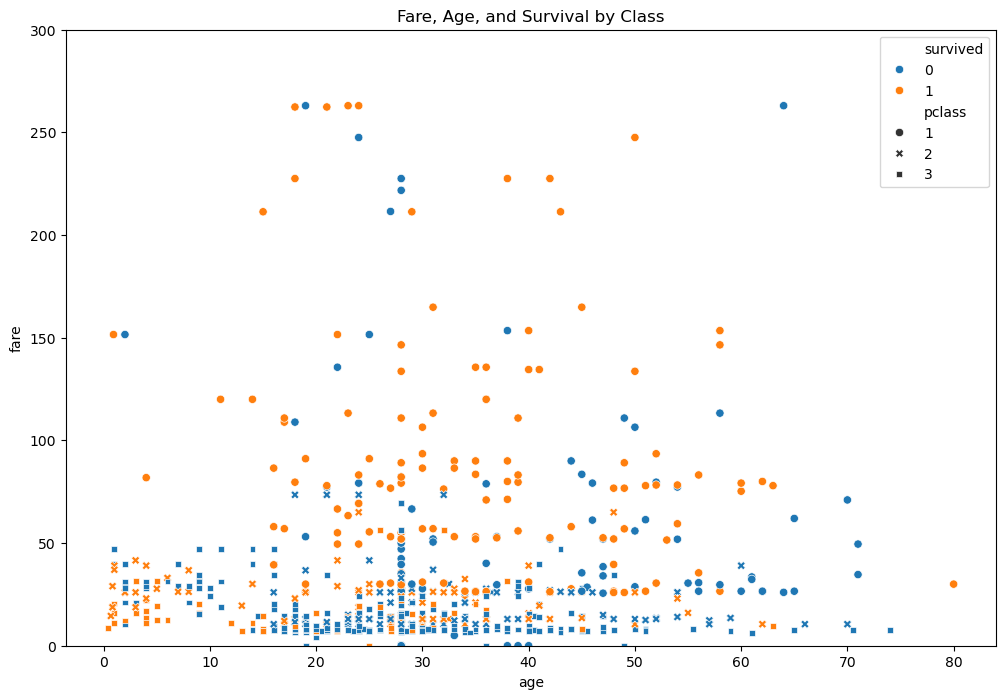

In [128]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='fare', hue='survived', style='pclass', data=df)
plt.ylim(0, 300)
plt.title('Fare, Age, and Survival by Class')
plt.show()

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,class_num,alive_num,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,3,0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1,1,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,3,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1,1,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,3,0,1


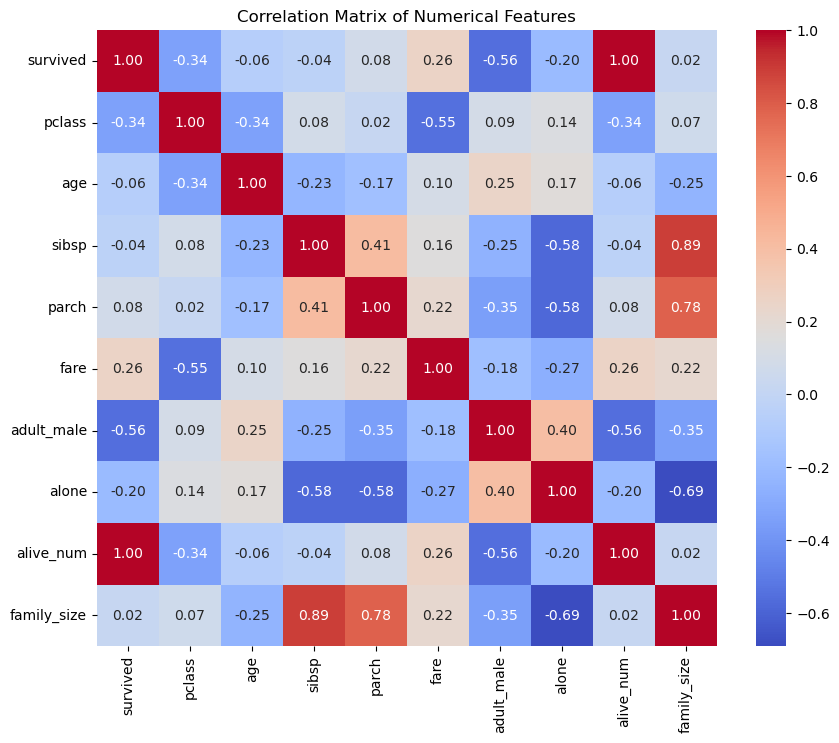

In [133]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

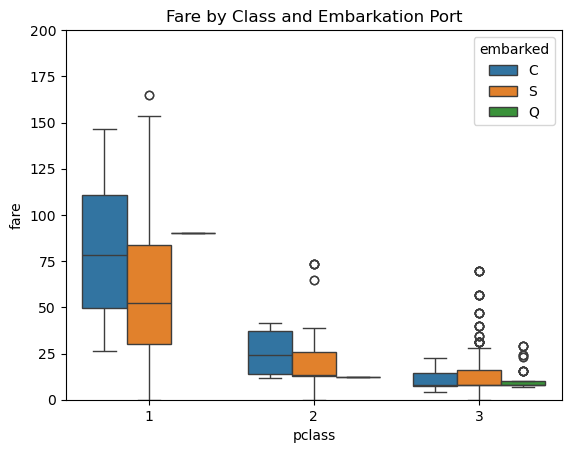

In [134]:
sns.boxplot(x='pclass', y='fare', hue='embarked', data=df)
plt.ylim(0, 200)
plt.title('Fare by Class and Embarkation Port')
plt.show()

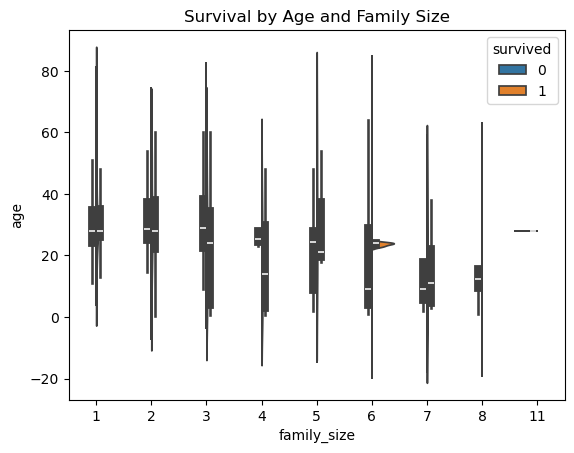

In [135]:
sns.violinplot(x='family_size', y='age', hue='survived', data=df, split=True)
plt.title('Survival by Age and Family Size')
plt.show()

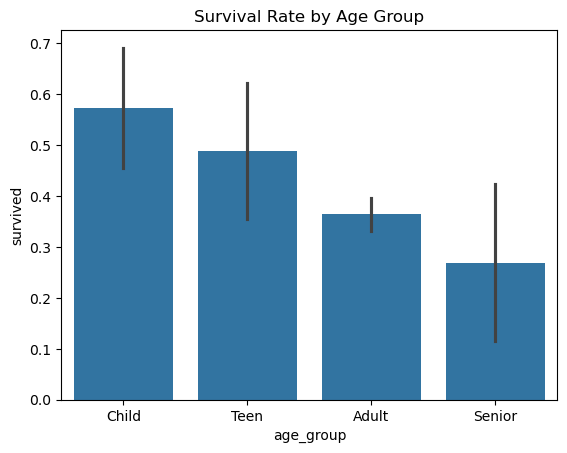

In [136]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

sns.barplot(x='age_group', y='survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

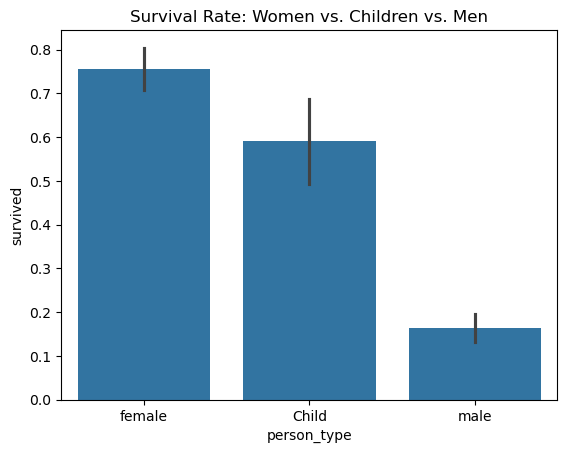

In [137]:
df['person_type'] = df.apply(lambda row: 'Child' if row['age'] < 16 else row['sex'], axis=1)

sns.barplot(x='person_type', y='survived', data=df, order=['female', 'Child', 'male'])
plt.title('Survival Rate: Women vs. Children vs. Men')
plt.show()

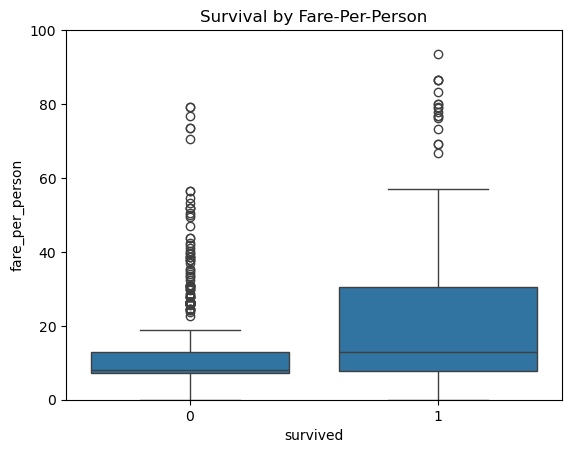

In [140]:

df['fare_per_person'] = df['fare'] / df['family_size']
sns.boxplot(x='survived', y='fare_per_person', data=df)
plt.ylim(0, 100)
plt.title('Survival by Fare-Per-Person')
plt.show()

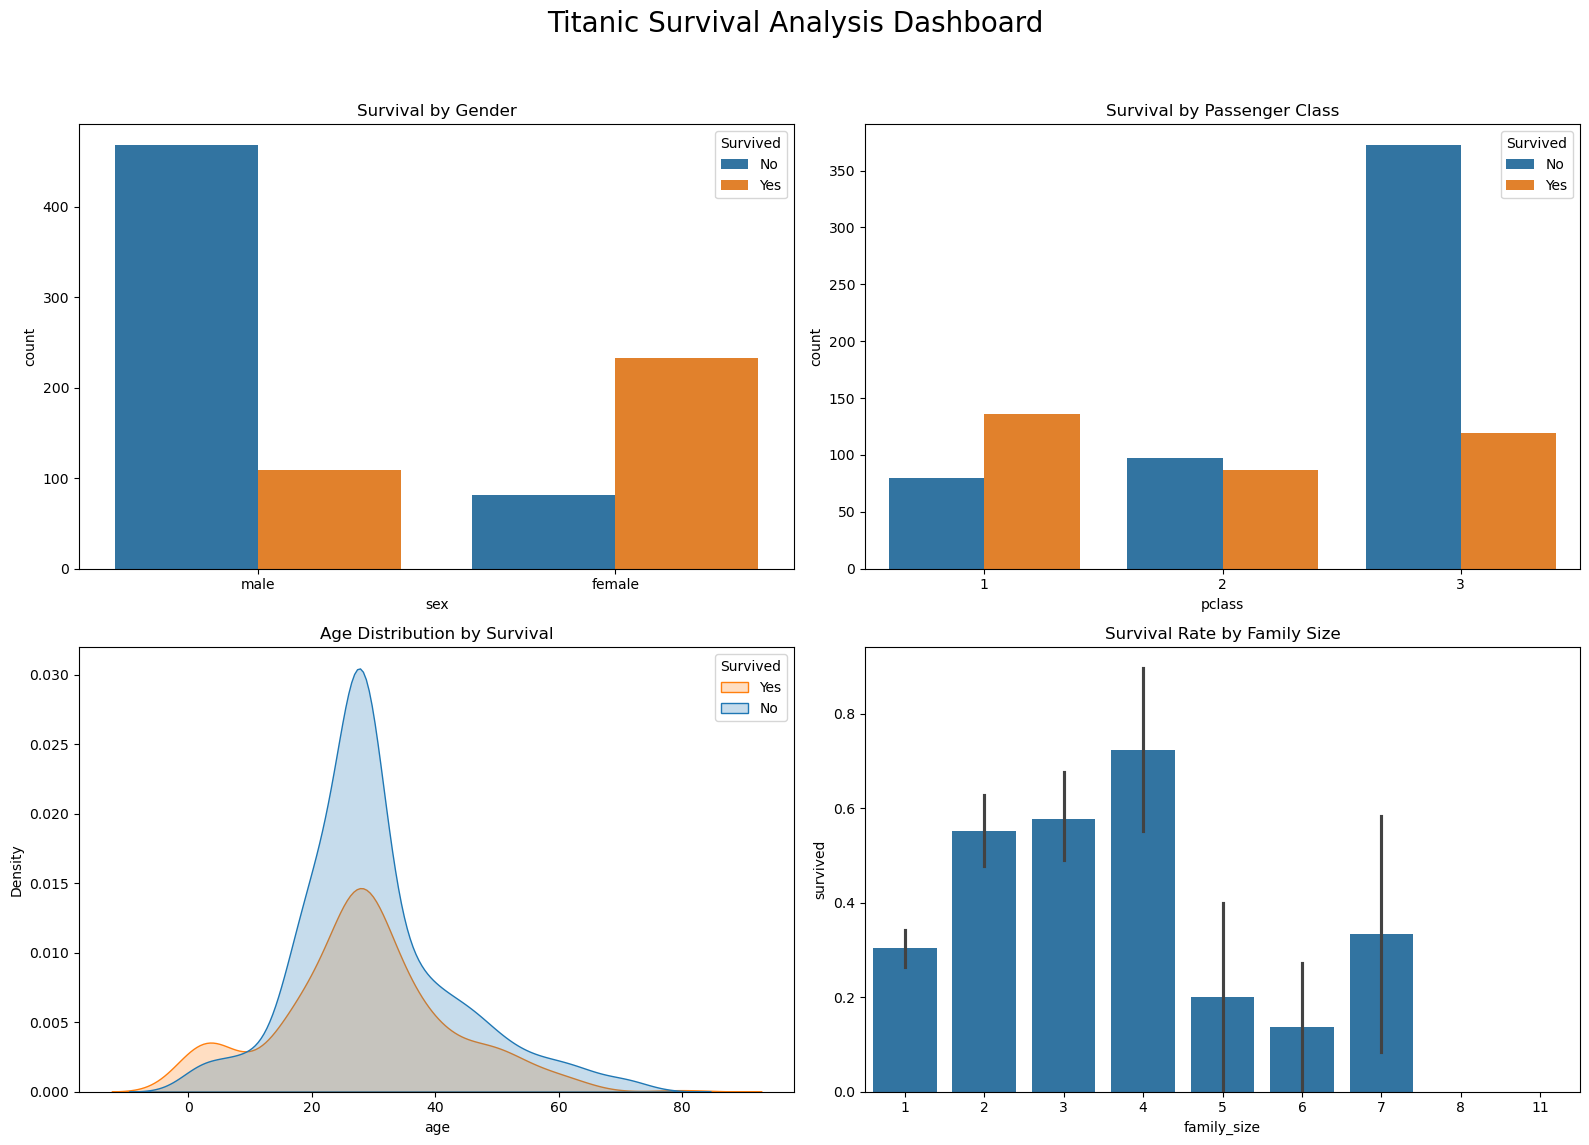

In [143]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Add a main title for the entire figure
fig.suptitle('Titanic Survival Analysis Dashboard', fontsize=20)

sns.countplot(ax=axes[0, 0], x='sex', hue='survived', data=df)
axes[0, 0].set_title('Survival by Gender')
axes[0, 0].legend(title='Survived', labels=['No', 'Yes'])

sns.countplot(ax=axes[0, 1], x='pclass', hue='survived', data=df)
axes[0, 1].set_title('Survival by Passenger Class')
axes[0, 1].legend(title='Survived', labels=['No', 'Yes'])
sns.kdeplot(ax=axes[1, 0], x='age', hue='survived', data=df, fill=True)
axes[1, 0].set_title('Age Distribution by Survival')
axes[1, 0].legend(title='Survived', labels=['Yes', 'No']) 

sns.barplot(ax=axes[1, 1], x='family_size', y='survived', data=df)
axes[1, 1].set_title('Survival Rate by Family Size')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()